In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, sqrt, log

/home/ste/reinforcement_libraries/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


max y = 0.020073733599999772 at x = 873869


/home/ste/reinforcement_libraries/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


max y = 0.019582381862499946 at x = 701077


/home/ste/reinforcement_libraries/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


max y = 0.01986978861249996 at x = 386512


/home/ste/reinforcement_libraries/baselines/baselines/bench/monitor.py:161: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


max y = 0.01986978861249996 at x = 386512


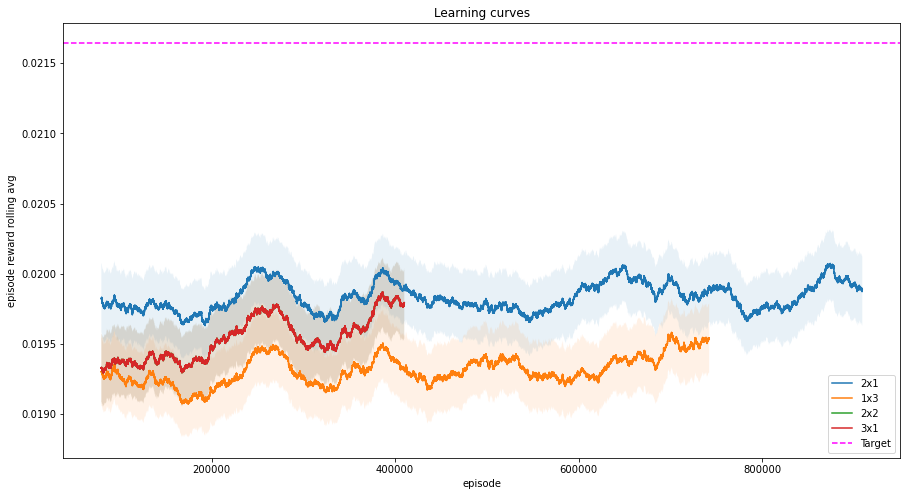

In [2]:
from plot_logs import plot_rolling, pu

LOG_FOLDER = './logs/TVS_simple-v0/'   #in which folder I find the file to plot
WHICH_LOGS = [
    #('ppo2_1e7_1x2_3e-4long_month_observation', '1x2')
    ('ppo2_1e7_2x1_3e-4long_month_observation', '2x1'),
    ('ppo2_1e7_1x3_3e-4long_month_observation','1x3'),
    ('ppo2_1e7_2x2_3e-4long_month_observation','2x2'),
    ('ppo2_1e7_2x2_3e-4long_month_observation','3x1')
    ]
X_AXIS_TIMESTEPS = False  # otherwise: episodes
WINDOW = 80000  # measured in episodes  10000
plt.figure(figsize=(15,8))
for log, title in WHICH_LOGS:
    results = pu.load_results(LOG_FOLDER + log)
    r = results[0]
    steps = np.cumsum(r.monitor.l) if X_AXIS_TIMESTEPS else np.array(r.monitor.l.index)
    rewards = r.monitor.r           # episode reward
    plot_rolling(steps, rewards, WINDOW, title)
plt.axhline(0.02164504542025035, color='magenta', linestyle = '--',label="Target")
plt.legend()
plt.xlabel('time step' if X_AXIS_TIMESTEPS else 'episode')
plt.ylabel('episode reward rolling avg')
plt.title('Learning curves')
plt.show()

env_type: tvs_simple_env


Logging to /tmp/openai-2020-08-24-23-22-53-586830

zero interest rate time grid [0.         0.25       0.33333333 1.        ]
zero interest rate:  [0.01 0.01 0.01 0.01]
Forward repo time grid [0.08333333 0.33333333 1.        ]
Forward repo rate:  [0.072 0.032 0.057]
Forward volatility time grid:  [0.16666667 0.41666667 1.        ]
Forward volatility:  [0.2 0.2 0.2]
Forward repo time grid [0.08333333 0.33333333 1.        ]
Forward repo rate:  [0.022 0.022 0.022]
Forward volatility time grid:  [0.16666667 0.5        1.        ]
Forward volatility:  [0.2 0.2 0.2]
Training ppo2 on tvs_simple_env:TVS_simple-v0 with arguments 
{'num_layers': 3, 'num_hidden': 5, 'lr': 0.0003, 'activation': <function tanh at 0x7fc8f09e3510>, 'load_path': './trained_agents/TVS_simple-v0/ppo2_2e7_3x5_3e-4month_observation_two_assets_ultimate_prova_new_long', 'network': 'mlp'}


Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use keras.layers.flatten instead

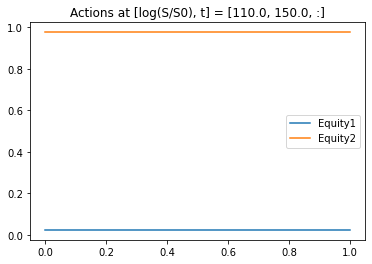

In [3]:
import tensorflow as tf
from plot_agent import plot, build_args,model_creation
# MAIN: plot actions for several agents

# configurations: which environment and agents
PLOT_VALUE = False  # otherwise plots actions
VARIABLE_INDEXES = (2,)  # tuple of length 1 (2d plot) or 2 (3d plot)
VARIABLE_POINTS = 12
ENV = 'TVS_simple-v0'
REFERENCE_STATE = np.array([110.0, 150.0,0])
X_MAX = 1
ACTION_SPACE_DESCRIPTION = '[log(S/S0), t]'
AGENTS = [
    (build_args(ENV, 'ppo2', '2e7', '3', '5', '3e-4', custom_suffix='month_observation_two_assets_ultimate_prova_new_long'), {'action_grid_size': 0}, 'PPO')#,
    ]

reference_str = list(map(str, REFERENCE_STATE))
for ivar in VARIABLE_INDEXES:
    reference_str[ivar] = ':'
z_name = 'Value function' if PLOT_VALUE else 'Actions'
title = '{} at {} = ['.format(z_name, ACTION_SPACE_DESCRIPTION) + ', '.join(reference_str) + ']'

for (arg, env_args, lbl) in AGENTS:
    g = tf.Graph()
    sess = tf.InteractiveSession(graph=g)
    with g.as_default():
        plot(arg, PLOT_VALUE, env_args, REFERENCE_STATE, VARIABLE_INDEXES, VARIABLE_POINTS, title, lbl, X_MAX,strategy_long=True, all_time_dep = True)


plt.legend()
plt.show()


zero interest rate time grid [0.         0.25       0.33333333 1.        ]
zero interest rate:  [0.01 0.01 0.01 0.01]
Forward repo time grid [0.08333333 0.33333333 1.        ]
Forward repo rate:  [0.072 0.032 0.057]
Forward volatility time grid:  [0.16666667 0.41666667 1.        ]
Forward volatility:  [0.2 0.2 0.2]
Forward repo time grid [0.08333333 0.33333333 1.        ]
Forward repo rate:  [0.022 0.022 0.022]
Forward volatility time grid:  [0.16666667 0.5        1.        ]
Forward volatility:  [0.2 0.2 0.2]


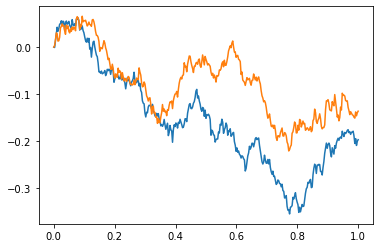

In [8]:
x = np.linspace(0,1,365)
S = model_creation(13,x)
for i in range(2):
    plt.plot(x, log(S[:,i]/S[0,i]), label='Equity '+str(i+1))
